# SGD Linear Regression

## Objective:

Given a Data point, predict the price of house in Boston. For this i'm going to use below and lets compare the results of these implementations
1. Scikit-Learn [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)
2. My own Implementation of SGD regression 


#### Description - Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of UCI ML housing dataset.
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/


This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.

The Boston house-price data has been used in many machine learning papers that address regression
problems.   
     
.. topic:: References

   - Belsley, Kuh & Welsch, 'Regression diagnostics: Identifying Influential Data and Sources of Collinearity', Wiley, 1980. 244-261.
   - Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import sklearn
import random
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [2]:
bostonObject = load_boston()
#creating a dataframe with boston data 
bostonDataframe = pd.DataFrame(bostonObject.data)
bostonDataframe.columns = bostonObject.feature_names
bostonDataframe["PRICE"] = bostonObject.target
bostonDataframe = bostonDataframe[bostonDataframe["PRICE"]<47]

In [3]:
bostonDataframe.head()# printing sample data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Splitting Data - Train(70%) & Test(30%)

Source: __https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6__
![](https://miro.medium.com/max/1420/1*-8_kogvwmL1H6ooN1A1tsQ.png)

In [4]:
xTrain,xTest,yTrain,yTest = sklearn.model_selection.train_test_split(bostonDataframe[bostonDataframe.columns[:-1]], 
                                             bostonDataframe["PRICE"], 
                                             test_size = 0.3, 
                                             shuffle = True)
standardiser = sklearn.preprocessing.StandardScaler()
xTrain = standardiser.fit_transform(xTrain)
xTest = standardiser.transform(xTest)
print("Train input shape  :"+str(xTrain.shape))
print("Train target shape :"+str(xTest.shape))
print("Test input shape   :"+str(yTrain.shape))
print("Test target shape  :"+str(yTest.shape))

Train input shape  :(340, 13)
Train target shape :(147, 13)
Test input shape   :(340,)
Test target shape  :(147,)


In [5]:
yTrain.values

array([22. , 22.3, 22.2, 23.9, 15. , 19.2, 15.2, 22.6, 22.8, 19.6, 18.2,
       20.3, 13.3, 10.4, 26.4, 31.2, 23.3, 44.8, 21.4, 28.6, 14.8, 14.1,
        8.4, 20.5,  7.2, 11.5, 21.8, 20.4, 23.1, 20.4,  5.6, 33.3, 21.6,
       32.9, 14.3, 10.9, 24.3, 23.9, 24.4,  7.2, 23.1, 15.4, 20.6, 23. ,
        7.4, 17.4, 20.3, 12.7, 19.6, 16. , 28.1, 18.5,  7. , 17.6, 15.7,
       26.7, 14.9, 22.6, 18.5, 31.5, 28.2, 28. , 24. , 42.3, 20.1, 29.1,
       21.7, 23.3, 10.5, 20.1, 29. , 15.6, 34.9, 20.4, 24.3, 13.9, 24.8,
       21.5, 13.8, 30.1, 23.4, 18.4, 22.2, 27.5, 24.4,  8.7, 18.9, 13.3,
       25.1, 24.8, 21.7, 16.1, 20. , 30.1, 25.2, 27. , 41.3, 17.8, 14.5,
       28.4, 26.2, 33.4, 17.8, 12.3, 14. , 12.7, 22.1, 16.5, 23.9, 25. ,
       36. , 16.1, 21.2, 19.1, 22.8, 33.1, 26.6, 18.6, 32.5, 18.2, 16.8,
       22.2, 22.6, 36.2, 23.6, 17.9, 21.9, 15.1, 20.8, 20. , 20.8, 16.6,
       33. , 17.8, 11.7, 26.6, 25. , 22.9, 23.2, 17.8, 16.2, 23.1, 21.4,
       23.7, 23.8, 17.4, 21.2, 17.4, 13.6, 18.5, 21

# Scikit-Learn SGD Regressor

In [6]:
#applying scikit-learn SGDRegressor on train dataset 
sklearnRegressor = sklearn.linear_model.SGDRegressor(shuffle = True,
                                                     verbose = 1,
                                                     eta0 = 0.1)
sklearnRegressor.fit(xTrain, yTrain)

-- Epoch 1
Norm: 5.72, NNZs: 13, Bias: 21.060027, T: 340, Avg. loss: 20.624565
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 5.86, NNZs: 13, Bias: 21.081213, T: 680, Avg. loss: 7.760177
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 6.08, NNZs: 13, Bias: 21.314685, T: 1020, Avg. loss: 7.739416
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 5.85, NNZs: 13, Bias: 20.960157, T: 1360, Avg. loss: 7.967514
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 5.95, NNZs: 13, Bias: 20.763896, T: 1700, Avg. loss: 7.652463
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 6.20, NNZs: 13, Bias: 21.270382, T: 2040, Avg. loss: 7.424017
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 6.18, NNZs: 13, Bias: 20.961247, T: 2380, Avg. loss: 7.310322
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 5.52, NNZs: 13, Bias: 21.048019, T: 2720, Avg. loss: 7.480496
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 5.76, NNZs: 13, Bias: 21.030814, T: 3060, Avg. loss: 7.658884
Total trai

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=1,
             warm_start=False)

In [7]:
title = "Scikit-Learn Regressor \nmean sqaured error on test data: "+str(sklearn.metrics.mean_squared_error(yTest, sklearnRegressor.predict(xTest)))

In [8]:
print("Scikit-Learn regressor weights : "+str(sklearnRegressor.coef_))
print("Scikit-Learn regressor bias : "+str(sklearnRegressor.intercept_))

Scikit-Learn regressor weights : [-1.24193771  0.96354376 -0.19258827  0.40980914 -1.40689268  1.56605911
 -0.75642532 -2.99399735  1.6901203  -1.8561124  -1.22015793  0.54190539
 -2.47533844]
Scikit-Learn regressor bias : [21.24484837]


Text(0.5, 0.98, 'Scikit-Learn Regressor \nmean sqaured error on test data: 15.532173388858634')

<Figure size 720x720 with 0 Axes>

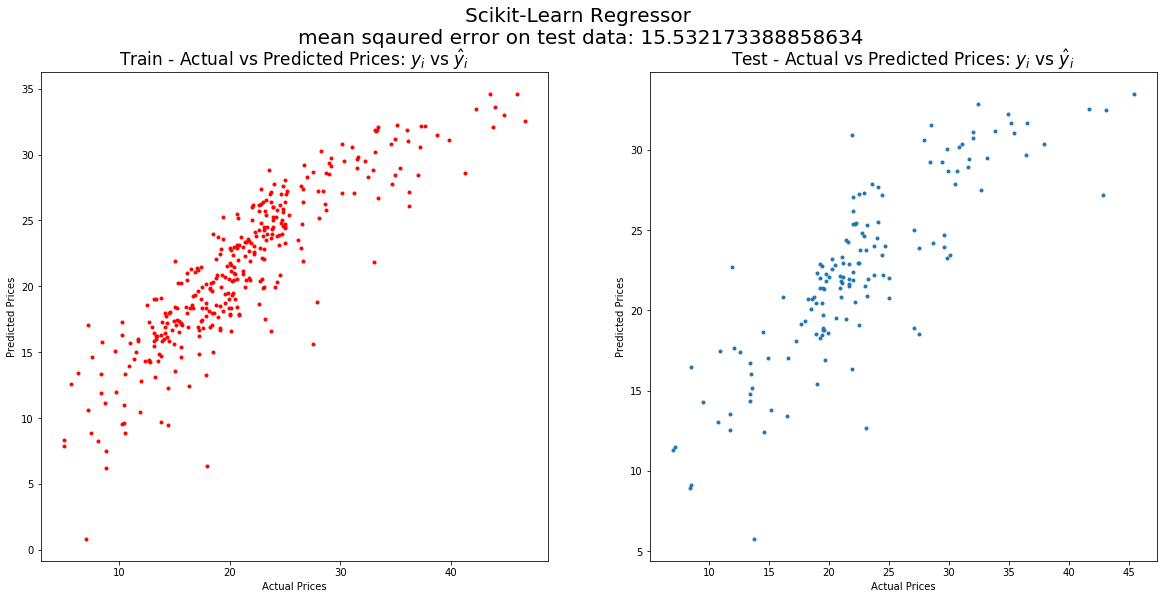

In [9]:
plt.figure(figsize=(10,10))
f,(ax1,ax2) = plt.subplots(1,2,figsize=(20,9))
ax1.scatter(yTrain,sklearnRegressor.predict(xTrain),c="red",marker=".")
ax1.set_xlabel("Actual Prices")
ax1.set_ylabel("Predicted Prices")
ax1.set_title("Train - Actual vs Predicted Prices: $y_i$ vs $\hat{y}_i$ ")
ax1.title.set_fontsize(17)
ax2.scatter(yTest,sklearnRegressor.predict(xTest),marker=".")
ax2.set_xlabel("Actual Prices")
ax2.set_ylabel("Predicted Prices")
ax2.set_title("Test - Actual vs Predicted Prices: $y_i$ vs $\hat{y}_i$ ")
ax2.title.set_fontsize(17)
plt.suptitle(title,fontsize=20)

Frow the above plots, it is deciphered that train predictions and test predictions are approximately similar

# Linear Regression Custom Implementation

Given a data set$\displaystyle \{y_{i},\,x_{i1},\ldots ,x_{ip}\}_{i=1}^{n}$ of $n$ statistical units, a linear regression model assumes that the relationship between the dependent variable $y$ and the $p$-vector of regressors $x$ is linear. This relationship is modeled through a disturbance term or error variable $ε$ — an unobserved random variable that adds "noise" to the linear relationship between the dependent variable and regressors. Thus the model takes the form:<br>
$${\displaystyle y_{i}=\beta _{0}+\beta _{1}x_{i1}+\cdots +\beta _{p}x_{ip}+\varepsilon _{i}=\mathbf {x} _{i}^{\mathsf {T}}{{\beta }}+\varepsilon _{i},\qquad i=1,\ldots ,n,}$$

where $T$ denotes the transpose, so that ${x_i}^T\beta$ is the inner product between vectors $x_i$ and $\beta$.

Often these n equations are stacked together and written in matrix notation as

$${\displaystyle \mathbf {y} =X{ {\beta }}+{\beta_0 },\,}$$

where

$${\displaystyle \mathbf {y} ={\begin{pmatrix}y_{1}\\y_{2}\\\vdots \\y_{n}\end{pmatrix}},\quad }$$

$${\displaystyle X={\begin{pmatrix}\mathbf {x} _{1}^{\mathsf {T}}\\\mathbf {x} _{2}^{\mathsf {T}}\\\vdots \\\mathbf {x} _{n}^{\mathsf {T}}\end{pmatrix}}={\begin{pmatrix}x_{11}&x_{12}&\cdots &x_{1p}\\x_{21}&x_{22}&\cdots &x_{2p}\\ \vdots&\vdots &\ddots&\vdots \\x_{n1}&x_{n2}&\cdots &x_{np}\end{pmatrix}},}$$

$${\displaystyle {\boldsymbol {\beta }}={\begin{pmatrix}\beta _{1}\\\beta _{2}\\\vdots \\\beta _{p}\end{pmatrix}}.}$$

Some remarks on notation and terminology:<br>
 - $\mathbf {y}$ is a vector of observed values ${\displaystyle y_{i}\ (i=1,\ldots ,n)}$ of the variable called the *regressand, endogenous variable, response variable, measured variable, criterion variable, or dependent variable.* This variable is also sometimes known as the *predicted variable*, but this should not be confused with *predicted values*, which are denoted ${\hat {y}}$. The decision as to which variable in a data set is modeled as the dependent variable and which are modeled as the independent variables may be based on a presumption that the value of one of the variables is caused by, or directly influenced by the other variables. Alternatively, there may be an operational reason to model one of the variables in terms of the others, in which case there need be no presumption of causality.

 - $X$ may be seen as a matrix of row-vectors $\mathbf {x} _{i}$ or of n-dimensional column-vectors $X_{j}$, which are known as *regressors, exogenous variables, explanatory variables, covariates, input variables, predictor variables, or independent variables*. The matrix $X$ is sometimes called the design matrix.
     
 - ${\boldsymbol {\beta }}$ is a $(p)$-dimensional parameter vector, where $\beta _{0}$ is the intercept term. Its elements are known as *effects or regression coefficients*. Statistical estimation and inference in linear regression focuses on $β$. The elements of this parameter vector are interpreted as the partial derivatives of the dependent variable with respect to the various independent variables.

#### Iterative Method

In stochastic (or "on-line") gradient descent, the true gradient of $Q(\beta)$ is approximated by a gradient at a single example:$$ \beta=\beta-\eta \nabla Q_{i}(\beta)$$.

As the algorithm sweeps through the training set, it performs the above update for each training example. Several passes can be made over the training set until the algorithm converges. If this is done, the data can be shuffled for each pass to prevent cycles. Typical implementations may use an adaptive learning rate so that the algorithm converges.

In pseudocode, stochastic gradient descent can be presented as follows:

 - Choose an initial vector of parameters $w$ and learning rate $\eta$. 
 - Repeat until an approximate minimum is obtained:
     - Randomly shuffle examples in the training set.
     - For ${\displaystyle i=1,2,...,n}$, do:
         - $\beta=\beta-\eta \nabla Q_{i}(\beta)$.

A compromise between computing the true gradient and the gradient at a single example is to compute the gradient against more than one training example (called a "mini-batch") at each step. This can perform significantly better than "true" stochastic gradient descent described, because the code can make use of vectorization libraries rather than computing each step separately. It may also result in smoother convergence, as the gradient computed at each step is averaged over more training examples.

The convergence of stochastic gradient descent has been analyzed using the theories of convex minimization and of stochastic approximation. Briefly, when the learning rates 4\eta4 decrease with an appropriate rate, and subject to relatively mild assumptions, stochastic gradient descent converges almost surely to a global minimum when the objective function is convex or pseudoconvex, and otherwise converges almost surely to a local minimum.

#### Example

Let's suppose we want to fit a straight line ${\displaystyle {\hat {y}_i}=\!\beta_{0}+\beta_{1}x_{i1}+\beta_{2}x_{i2}+\cdots + \beta_{p}x_{ip}}$, where $x_i \in \Re^p$ to a training set with observations ${\displaystyle (x_{1},x_{2},\ldots ,x_{n})}$ and corresponding estimated responses ${\displaystyle ({\hat {y_{1}}},{\hat {y_{2}}},\ldots ,{\hat {y_{n}}})}$ using *least squares*. The objective function to be minimized is:


$$\displaystyle Q(\beta)=\sum _{i=1}^{n}Q_{i}(\beta)=\sum _{i=1}^{n}\left({\hat {y_{i}}}-y_{i}\right)^{2}=\sum _{i=1}^{n}\left(\beta_{0}+\beta_{1}x_{i1}+\beta_{2}x_{i2}+\cdots+\beta_{p}x_{ip}-y_{i}\right)^{2}.$$



The last line in the above pseudocode for this specific problem will become:

$\displaystyle {\begin{bmatrix}\beta_{0}\\\beta_{1}\\\vdots\\\beta_{p}\end{bmatrix}}:={\begin{bmatrix}\beta_{0}\\\beta_{1}\\\vdots\\\beta_{p}\end{bmatrix}}-\eta {\begin{bmatrix}{\frac {\partial }{\partial \beta_{0}}}(\beta_{0}+\beta_{1}x_{i1}+\beta_{2}x_{i2}+\cdots+\beta_{p}x_{ip}-y_{i})^{2}\\{\frac {\partial }{\partial \beta_{1}}}(\beta_{0}+\beta_{1}x_{i1}+\beta_{2}x_{i2}+\cdots+\beta_{p}x_{ip}-y_{i})^{2}\\\vdots\\{\frac {\partial }{\partial \beta_{p}}}(\beta_{0}+\beta_{1}x_{i1}+\beta_{2}x_{i2}+\cdots+\beta_{p}x_{ip}-y_{i})^{2}\end{bmatrix}}={\begin{bmatrix}\beta_{0}\\\beta_{1}\\\vdots\\\beta_{p}\end{bmatrix}}-\eta {\begin{bmatrix}2(\beta_{0}+\beta_{1}x_{i1}+\beta_{2}x_{i2}+\cdots+\beta_{p}x_{ip}-y_{i})\\2x_{i1}(\beta_{0}+\beta_{1}x_{i1}+\beta_{2}x_{i2}+\cdots+\beta_{p}x_{ip}-y_{i})\\\vdots\\2x_{ip}(\beta_{0}+\beta_{1}x_{i1}+\beta_{2}x_{i2}+\cdots+\beta_{p}x_{ip}-y_{i})\end{bmatrix}}.$

Note that in each iteration (also called update), only the gradient evaluated at a single point $x_{i}$ instead of evaluating at the set of all samples.

The key difference compared to standard (Batch) Gradient Descent is that only one piece of data from the dataset is used to calculate the step, and the piece of data is picked randomly at each step. 

In [10]:
class linearRegressor():
    def __init__(self,
                 batch_size = 4,
                 iterations = 1000,
                 learning_rate = 0.1,
                 verbose = False):
        self.batch_size = batch_size
        self.verbose = verbose
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = np.array([])
        self.bias = 0
        self.dataPoints = 0
        self.groups = []
        self.previousLoss = 0
        self.fit_called = False
    
    def createWeights(self, feature_size):
        return (np.random.uniform(-3,3,feature_size))
    
    def createBias(self):
        return np.random.uniform(-2,2,1)
    
    def sizeOfData(self):
        return len(self.inputs)
    
    def createGroups(self):
        order = list(range(self.sizeOfData()))
        random.shuffle(order)
        return [[order[x % len(order)] for x in range(i, i + self.batch_size)] for i in range(0, len(order), self.batch_size)]
    
    def predictEachSample(self,inp):
        assert self.fit_called == True, "Please fit the train data before predicting"
        assert len(inp) == len(self.weights), "feature size and length of input feature should be same"
        temp = 0
        for i in range(len(self.weights)):
            temp = temp + inp[i]*self.weights[i]
            
        return temp+self.bias
    
    def predict(self,inputs):
        assert self.fit_called == True, "Please fit the train data before predicting"
        return [self.predictEachSample(eachRecord) for eachRecord in inputs]
    
    def parameterUpdater(self,x,y,y_hat):
        for index,eachWeight in enumerate(self.weights):
            self.weights[index] = eachWeight - self.learning_rate*2*np.mean(x[:,index])*(np.mean(y_hat) - np.mean(y))
            
        self.bias = self.bias - self.learning_rate*2*(np.mean(y_hat) - np.mean(y))
        
    
    def fit(self, inputs, targets):
        self.inputs = inputs
        self.targets = targets
        assert len(inputs) == len(targets), "number of input records and targets should be same"
        self.fit_called = True
        self.weights = self.createWeights(len(self.inputs[0]))
        self.bias = self.createBias()
        self.groups = self.createGroups()
        for eachIteration in range(self.iterations):
            for eachGroup in self.groups:
                x = []; y = []; y_hat = []
                for eachRecord in eachGroup:
                    x.append(self.inputs[eachRecord]);y.append(self.targets[eachRecord])
                    y_hat.append(self.predictEachSample(self.inputs[eachRecord]))
                self.parameterUpdater(np.array(x),np.array(y),np.array(y_hat))
                currentLoss = sklearn.metrics.mean_squared_error(np.array(y),np.array(y_hat))
                
            if self.verbose == 1:
                print("iteration :"+str(eachIteration)+" Loss:"+str(currentLoss)+" LearningRate:"+str(self.learning_rate))
                
            if eachIteration%10 ==0:
                self.learning_rate = self.learning_rate/2
            random.shuffle(self.groups)
            
            if (np.abs(self.previousLoss - currentLoss) < 0.75):
                break
            else:
                self.previousLoss = currentLoss
                
                

In [11]:
regressor =linearRegressor(batch_size=3,verbose=1,iterations=500,learning_rate=0.1)

In [12]:
regressor.fit(xTrain,yTrain.values)

iteration :0 Loss:13.451951946492125 LearningRate:0.1
iteration :1 Loss:20.06289862402073 LearningRate:0.05
iteration :2 Loss:34.53361352414288 LearningRate:0.05
iteration :3 Loss:9.904894844130592 LearningRate:0.05
iteration :4 Loss:4.9924929971766945 LearningRate:0.05
iteration :5 Loss:1.7898930460563314 LearningRate:0.05
iteration :6 Loss:0.7429990840080812 LearningRate:0.05
iteration :7 Loss:6.348014778038114 LearningRate:0.05
iteration :8 Loss:22.56993348795855 LearningRate:0.05
iteration :9 Loss:5.361664671115488 LearningRate:0.05
iteration :10 Loss:13.292764243562202 LearningRate:0.05
iteration :11 Loss:1.7524053186971165 LearningRate:0.025
iteration :12 Loss:4.96655364277484 LearningRate:0.025
iteration :13 Loss:1.7115012764054345 LearningRate:0.025
iteration :14 Loss:9.47041140299391 LearningRate:0.025
iteration :15 Loss:6.215090909446727 LearningRate:0.025
iteration :16 Loss:17.550968415676575 LearningRate:0.025
iteration :17 Loss:33.69857840891763 LearningRate:0.025
iteratio

In [13]:
title = "Custom Implementation of Linear Regressor\nmean sqaured error on test data: "+str(sklearn.metrics.mean_squared_error(yTest, regressor.predict(xTest)))

In [14]:
print("Custom Implementation of Linear Regressor weights : "+str(regressor.weights))
print("Custom Implementation of Linear Regressor bias : "+str(regressor.bias))

Custom Implementation of Linear Regressor weights : [-1.11073879 -0.35270331  0.35136773  0.91356277 -2.59008626  2.29582419
 -1.28880971 -2.82451376  0.73813658 -0.77576853 -2.14660239  0.07086628
 -2.4702302 ]
Custom Implementation of Linear Regressor bias : [20.42372397]


Text(0.5, 0.98, 'Custom Implementation of Linear Regressor\nmean sqaured error on test data: 16.731212163756624')

<Figure size 720x720 with 0 Axes>

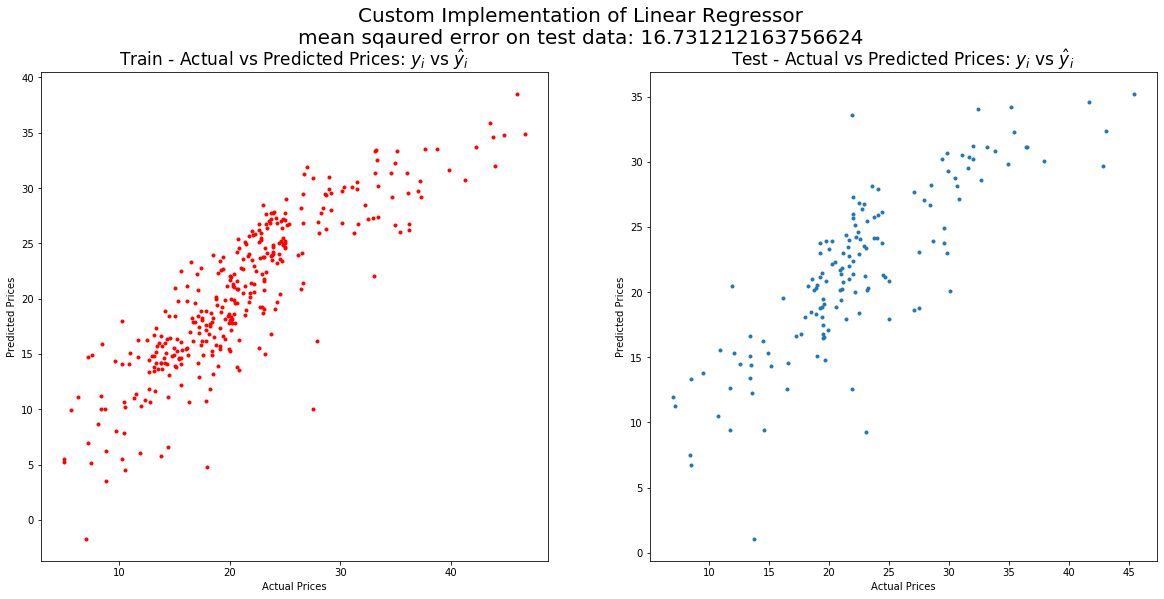

In [15]:
plt.figure(figsize=(10,10))
f,(ax1,ax2) = plt.subplots(1,2,figsize=(20,9))
ax1.scatter(yTrain,regressor.predict(xTrain),c="red",marker=".")
ax1.set_xlabel("Actual Prices")
ax1.set_ylabel("Predicted Prices")
ax1.set_title("Train - Actual vs Predicted Prices: $y_i$ vs $\hat{y}_i$ ")
ax1.title.set_fontsize(17)
ax2.scatter(yTest,regressor.predict(xTest),marker=".")
ax2.set_xlabel("Actual Prices")
ax2.set_ylabel("Predicted Prices")
ax2.set_title("Test - Actual vs Predicted Prices: $y_i$ vs $\hat{y}_i$ ")
ax2.title.set_fontsize(17)
plt.suptitle(title,fontsize=20)

# Conclusion

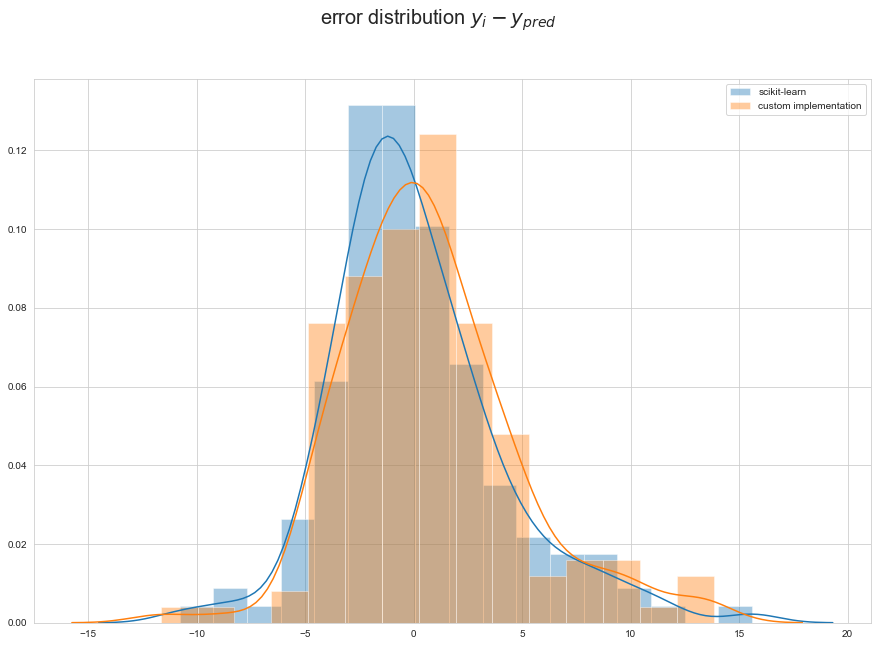

In [16]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
sns.distplot(np.array(yTest - sklearnRegressor.predict(xTest)),label = "scikit-learn")
sns.distplot(np.array(yTest - np.asarray(regressor.predict(xTest)).ravel()),label = "custom implementation")
plt.suptitle("error distribution $y_i - y_{pred}$",fontsize=20)
plt.legend()

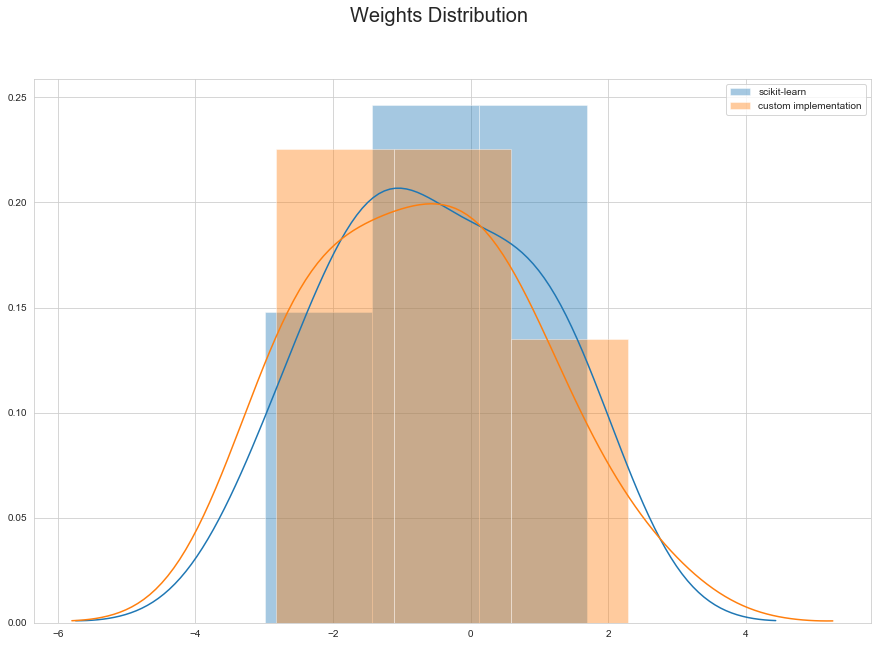

In [17]:
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
sns.distplot(np.array(sklearnRegressor.coef_),label = "scikit-learn")
sns.distplot(np.array(regressor.weights),label = "custom implementation")
plt.suptitle("Weights Distribution",fontsize=20)
plt.legend()

In [18]:
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ["Regressor","Train MSE","Test MSE"]
table.add_row(["scikit-learn Regressor",
               mean_squared_error(yTrain,sklearnRegressor.predict(xTrain)),
               mean_squared_error(yTest,sklearnRegressor.predict(xTest))])
table.add_row(["custom Linear Regressor",
               mean_squared_error(yTrain,regressor.predict(xTrain)),
               mean_squared_error(yTest,regressor.predict(xTest))])
print(table)

+-------------------------+--------------------+--------------------+
|        Regressor        |     Train MSE      |      Test MSE      |
+-------------------------+--------------------+--------------------+
|  scikit-learn Regressor | 13.845092663714265 | 15.532173388858634 |
| custom Linear Regressor | 15.203709246258901 | 16.731212163756624 |
+-------------------------+--------------------+--------------------+
